In [1]:
import os
import sys
import warnings


sys.path.append(os.path.abspath('../scripts'))
warnings.filterwarnings('ignore')


In [2]:
import sales_analysis as sa
import chi_squaredAnlaysis as chi

In [3]:
path = ['../data/train.csv' , '../data/test.csv']
train , test  = sa.load_data(path)

2024-09-19 18:02:24,445 - root - INFO - data loading started


In [4]:
train.shape

(1017209, 9)

## Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

### i used chi-squared analysis

2024-09-19 18:02:25,705 - root - INFO - check for distribution and plot
2024-09-19 18:02:25,728 - root - INFO - distribution calcualted sucessfully
2024-09-19 18:02:25,796 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-19 18:02:25,813 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-19 18:02:25,885 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-19 18:02:25,904 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all

train promo distribution : Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
test promo distribution: Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


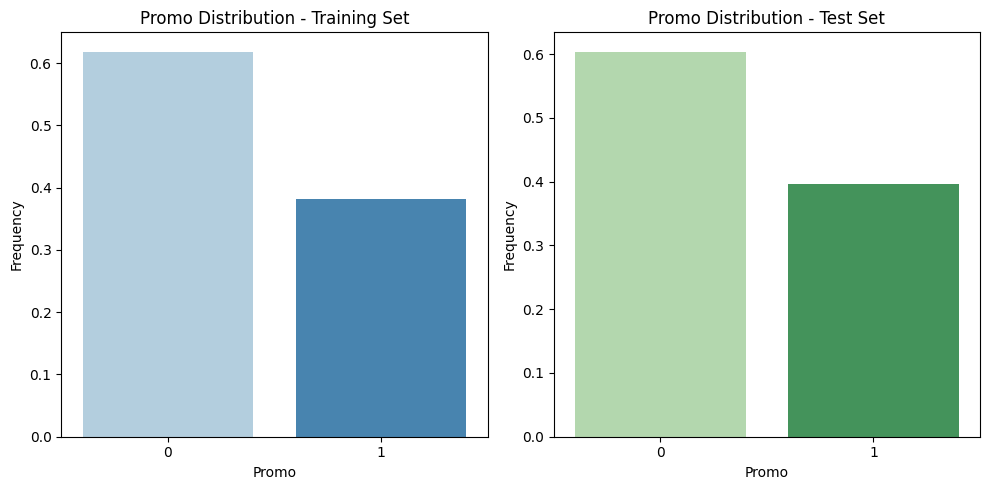

In [5]:
chi.check_for_distribution_and_plot(train,test)

## we can see that it is alsmost have the same distribution

In [6]:
chi.chi_square_test(train,test)

2024-09-19 18:02:26,377 - root - INFO - working on Statistical Test - Chi-Squared Test


Chi-Squared Test Statistic: 0.0008573242970804401
P-Value: 0.9766411974374951
The Promo distributions are similar.


#### The Promo distributions are similar.
#### 2024-09-19 18:02:26,377 - root - INFO - working on Statistical Test - Chi-Squared Test
#### Chi-Squared Test Statistic: 0.0008573242970804401
#### P-Value: 0.9766411974374951


## Check & compare sales behavior before, during, and after holidays

## Time Series Analysis

In [7]:
train_data = sa.set_date_index(train)
train_data

2024-09-19 18:02:26,414 - root - INFO - changing the date column to standaed date time format


2024-09-19 18:02:26,673 - root - INFO - making the date column the index of the data frame


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1


2024-09-19 18:02:26,707 - root - INFO - Plotting weekly sales ...


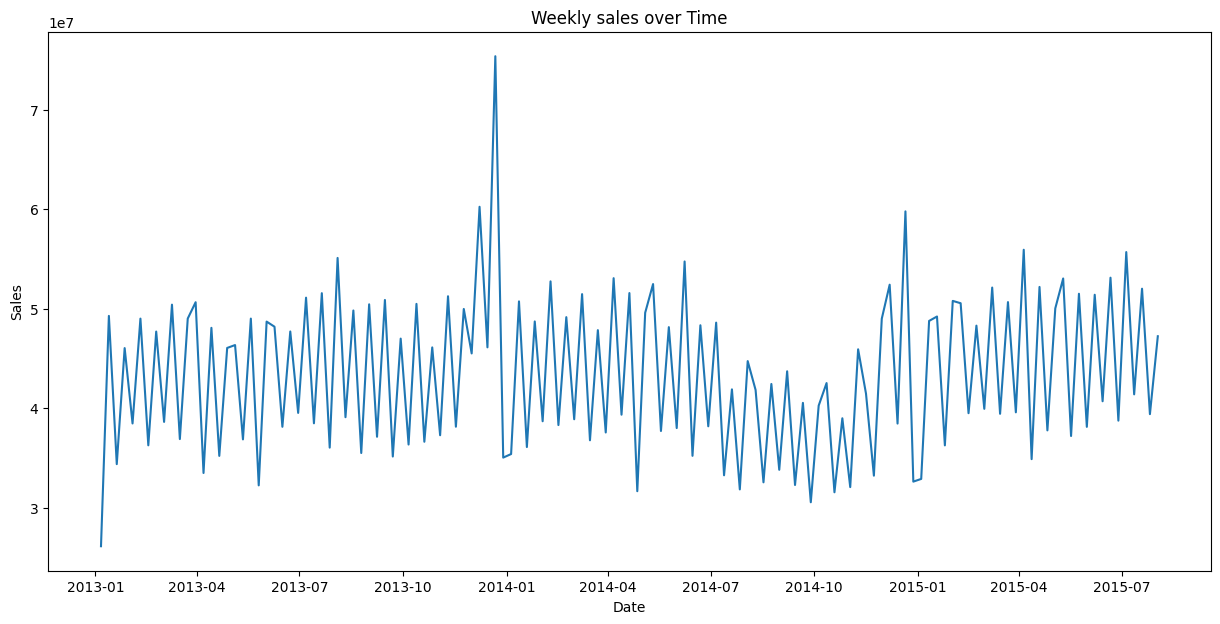

In [8]:
sa.plot_weekly_sales(train_data)